In [1]:
###################################################################################
# Magnets and Pain Relief
# Case Study: https://onlinestatbook.com/case_studies_rvls/magnets/index.html
#
#
# file: case_study_magnetes_pain_sol.R
###################################################################################

library(tidyverse)

# Is it possible that magnetic fields can reduce pain?


-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.1
v ggplot2   3.5.0     v tibble    3.2.1
v lubridate 1.9.3     v tidyr     1.3.1
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [45]:

# Load the raw data
raw.data <- read_csv2(
  "magnets_pain.csv")
raw.data

i Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.

Rows: 50 Columns: 4
-- Column specification --------------------------------------------------------
Delimiter: ";"
dbl (4): Score_1, Score_2, Change, Active

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


Score_1,Score_2,Change,Active
<dbl>,<dbl>,<dbl>,<dbl>
10,0,10,1
10,4,6,1
8,7,1,1
10,0,10,1
10,4,6,1
10,2,8,1
10,5,5,1
10,5,5,1
9,3,6,1


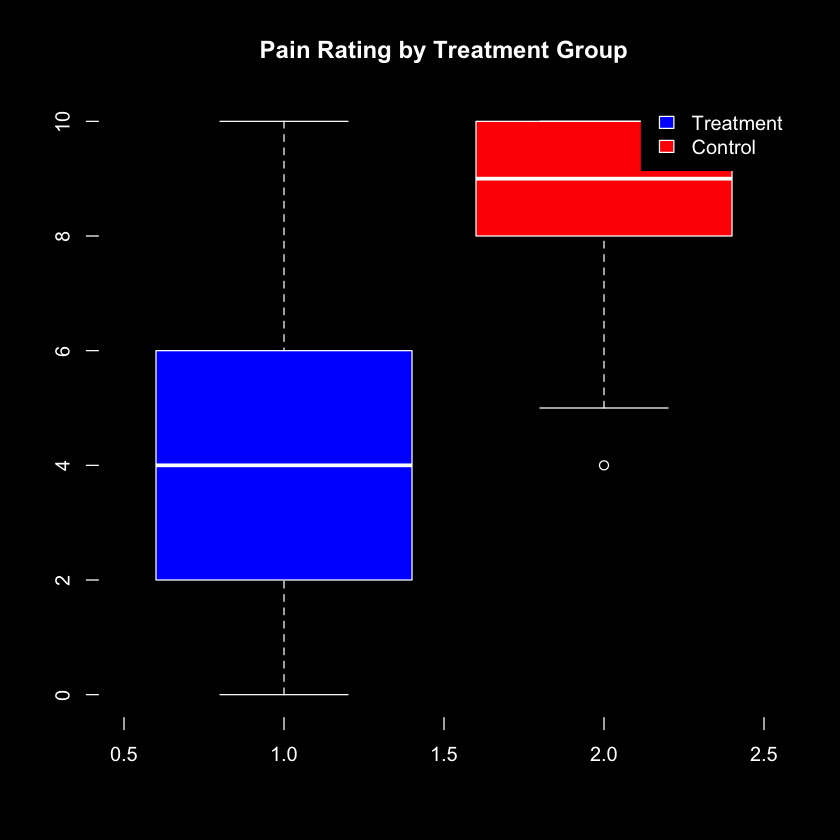

In [52]:
# Customize the plot background
par(bg = "black")

boxplot(Score_2 ~ Active, data = raw.data,  #but why do I absolutely need to group it?
        names = c("Treatment", "Control"), 
        ylab = "Pain Rating", xlab = "", col = c("blue", "red"), border = "white", las = 1, outline = TRUE)

#Score_2 ~ Active: This specifies
#that we want to plot "Score_2"
#on the y-axis and group it by the levels
#of the "Active" variable on the x-axis.

# Customize the axis labels and ticks
axis(1, col.axis = "white", col.ticks = "white")
axis(2, col.axis = "white", col.ticks = "white")

# Add a title with white text
title(main = "Pain Rating by Treatment Group", col.main = "white")

# Add a legend with white text
legend("topright", legend = c("Treatment", "Control"), fill = c("blue", "red"), border = "white", text.col = "white", bg = "black")


In [44]:
get_boxplot_values <- function(data, column_name) {
  column <- data[[column_name]]
  stats <- boxplot.stats(column)
  return(stats$stats)
}
# Specify the column name
column_name <- "Score_2"

# Get boxplot values for the specified column
boxplot_values <- get_boxplot_values(raw.data, column_name)
boxplot_values

[1]  0  4  6 10 10

In [53]:
get_boxplot_values <- function(data, group_column, column_name) {
  stats_list <- tapply(data[[column_name]], data[[group_column]], boxplot.stats)
  return(stats_list)
}

# Specify the grouping column and the column for boxplot values
group_column <- "Active"
column_name <- "Score_2"

# Get boxplot values for each group
boxplot_values <- get_boxplot_values(raw.data, group_column, column_name)

# Print the summary statistics for each group
print(boxplot_values)

$`1`
$`1`$stats
[1]  0  2  4  6 10

$`1`$n
[1] 29

$`1`$conf
[1] 2.826405 5.173595

$`1`$out
numeric(0)


$`2`
$`2`$stats
[1]  5  8  9 10 10

$`2`$n
[1] 21

$`2`$conf
[1] 8.310431 9.689569

$`2`$out
[1] 4




The output you provided is a list containing information about the boxplot statistics for each group (in this case, groups 1 and 2) of the "Active" variable. Here's what each part of the output means:

$1 and $2: These are the groups of the "Active" variable. In this case, group 1 corresponds to one level of the "Active" variable, and group 2 corresponds to another level.
For each group:

$stats: This contains the summary statistics of the data within the group. Specifically, it provides the minimum, lower hinge (25th percentile), median (50th percentile), upper hinge (75th percentile), and maximum values of the data. For example, in group 1, the values are 0, 2, 4, 6, and 10.

$n: This represents the number of observations (sample size) in the group. For example, in group 1, there are 29 observations.

$conf: This provides the confidence interval for the median of the data within the group. For example, in group 1, the confidence interval for the median is (2.826405, 5.173595).

$out: This lists any outliers present in the data within the group. If there are no outliers, it will display numeric(0), indicating an empty numeric vector. For example, in group 2, there is one outlier, which is the value 4.

Overall, this output provides a comprehensive summary of the distribution of the data within each group of the "Active" variable, which can be useful for further analysis and interpretation.


In [56]:
# The plot shows pain ratings of subjects treated with active magnets (Treatment)
# and those treated with inactive placebo devices (Control).

# What is the mean, min, max, Q1, Q2, Q3 and standard deviation for the group
# treated with active magnets?
raw.data %>%
  group_by(Active) %>%
  summarise(Mean = mean(Score_2), Min = min(Score_2), Max = max(Score_2),
            Q1 = quantile(Score_2, prob = 0.25), Median = median(Score_2),
            Q3 = quantile(Score_2, prob = 0.75), IQR = Q3-Q1, SD = sd(Score_2))

Active,Mean,Min,Max,Q1,Median,Q3,IQR,SD
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,4.379310,0,10,2,4,6,4,3.144312
2,8.428571,4,10,8,9,10,2,1.859339


In [58]:
# How do you interpret the boxplots and these characteristic numbers?
# Answers:
# a) The lowest pain rating of the control group appears to be equal to the median 
#    of the treatment group
# b) Overall, the group in the most pain is the control group.
# c) The middle 50% of the scores for the control group fall between 8-10.
# d) The circle represents an outlier.
# e) The range for the group that received the active magnets is 10.
# f) The pain ratings are more variable in the treatment condition.

# Inferential Statistics: t-test on post-treatment scores
# One way to test the hypothesis that magnets reduce pain is to test the null
# hypothesis that there is no difference in post-treatment ratings of pain. If
# this null hypothesis can be rejected, then it can be concluded that there is
# an effect of treatments, i.e. a difference in ratings between those treate
# with active magnets and those treated with placebo magnets.
# An independent-groups t-test can be used for this. This test makes three assumptions:
# -) The populations are each normally distributed.
# -) The variances in the populations are equal.
# -) Each observation is sampled randomly and is therefore independent of each
#    other observation.

# Here we assume that the populations are normally distributed.

# The active magnet group ratings were more variable (sd= 3.14) then were the
# ratings of the placebo group (sd = 1.86). An F test of the difference in
# variances can be computed by dividing the variance of the group with the larger
# variance by the variance of the group with the smaller variance.

treatment <- raw.data %>% filter(Active == 1)
control <- raw.data %>% filter(Active == 2)
var.test(
  x = treatment$Score_2, y = control$Score_2,
  alternative = "greater"
)


	F test to compare two variances

data:  treatment$Score_2 and control$Score_2
F = 2.8598, num df = 28, denom df = 20, p-value = 0.008893
alternative hypothesis: true ratio of variances is greater than 1
95 percent confidence interval:
 1.393891      Inf
sample estimates:
ratio of variances 
          2.859789 


In [60]:
# The variances are significantly different.

# Results of a 2-sample, unpaired t-test (Welch-test)
t.test(
  x = treatment$Score_2, y = control$Score_2,
  alternative = "two.sided", mu = 0,
  paired = FALSE, var.equal = FALSE
)


	Welch Two Sample t-test

data:  treatment$Score_2 and control$Score_2
t = -5.695, df = 46.418, p-value = 8.058e-07
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -5.480119 -2.618404
sample estimates:
mean of x mean of y 
 4.379310  8.428571 


In [61]:
# Interpretation: Subjects who had an active magnet reported significantly less
# pain than did subjects who recieved the placebo. The confidence interval on the
# difference between means shows that the effect is large and therefore of practical
# as well as statistical significance.

In [63]:
# sheet 9

# task 1: 2 sample Gauss Test
x <- c(5.46, 5.34, 4.34, 4.82, 4.4, 5.12, 5.69, 5.53, 4.77, 5.82)
y <- c(
       5.45, 5.31, 4.11, 4.69, 4.18, 5.05, 5.72, 5.54, 4.62, 5.89, 5.6, 5.19,
       3.31, 4.43, 5.3, 4.09
)
mean.x <- mean(x)
mean.y <- mean(y)
n.x <- length(x)
n.y <- length(y)
sigma.x <- 0.5 # wait what is sigma again for?
sigma.y <- 0.6

test.statistic <- (mean.x - mean.y) / sqrt(sigma.x^2 / n.x + sigma.y^2 / n.y)
# decisoon rule: reject H0 if
test.statistic < qnorm(0.05)
p.value <- pnorm(test.statistic)
p.value

# task 2
sample.1 <- c(
       7.06, 11.84, 9.28, 7.92, 13.5, 3.98, 3.82, 7.34, 8.7, 9.24, 4.86, 3.32,
       12.78, 12, 5.24, 11.4, 6.56, 9.04, 7.72, 9.26, 7.88, 8.6, 9.3, 8.42, 8.54
)
sample.2 <- c(
       8.68, 6, 6.3, 10.24, 10.88, 5.36, 7.82, 4.7, 9.02, 9.78, 6.9, 5.8, 13.56,
       10.32, 13.3, 11.38, 7.94, 10.74, 13.68, 14.92, 7.42, 10.36, 10.54,
       5.22, 13.74, 12.98, 10.34, 10.02, 17.8, 13.04, 5.2, 9.4, 11.18, 12.68,
       12.36
)
# H0: mu1 >= mu2, H1: mu1 < mu2
alpha <- 0.05
# check whether the variances are equal or not
var.test(
       x = sample.1, y = sample.2, ratio = 1, alternative = "two.sided",
       conf.level = 0.9
)
# F test to compare two variances
#
# data:  sample.1 and sample.2
# F = 0.73589, num df = 24, denom df = 34, p-value = 0.4377
# alternative hypothesis: true ratio of variances is not equal to 1
# 90 percent confidence interval:
#   0.3993547 1.4108015
# sample estimates:
#   ratio of variances
# 0.7358912
# decision: The H0 that both variances are equal can not be rejected, since the
# pvalue is bigger than 0.1!
# => Assumption both variances are equal, i.e conduct a t test

# H0: mu1 >= m2, H1: mu1 < mu2
t.test(
       x = sample.1, y = sample.2, mu = 0, alternative = "less", var.equal = TRUE,
       paired = FALSE, conf.level = 1 - alpha
)
# Two Sample t-test
#
# data:  sample.1 and sample.2
# t = -2.1444, df = 58, p-value = 0.0181
# alternative hypothesis: true difference in means is less than 0
# 95 percent confidence interval:
#   -Inf -0.3714405
# sample estimates:
#   mean of x mean of y
# 8.304000  9.988571
# Decision: reject H0

# task 3
# H0: mu1 = mu2, H1: mu1 <> mu2
# 2 sample paired test
sample.water <- c(16, 15, 11, 20, 19, 14, 13, 15, 14, 16)
sample.alc <- c(13, 13, 10, 18, 17, 11, 10, 15, 11, 16)
t.test(
       x = sample.water, y = sample.alc, alternative = "two.sided", paired = TRUE,
       conf.level = 0.95
)
# Paired t-test
#
# data:  sample.water and sample.alc
# t = 5.0186, df = 9, p-value = 0.0007205
# alternative hypothesis: true difference in means is not equal to 0
# 95 percent confidence interval:
#   1.043561 2.756439
# sample estimates:
#   mean of the differences
# 1.9
# decision: reject H0, since the pvalue is lower than 0.05; i.e. alcohol seems
# to have an effect

# task 4
sample.a <- c(102.4, 101.3, 97.6, 98.2, 102.3, 99.1, 97.8, 103.9, 101.6, 100.1)
sample.b <- c(98.4, 101.7, 100.5, 99.3, 100.6, 99.6, 102.2, 101.1, 99.9, 101.0)
# H0: sigma.a <= sigma.b, H1: sigma.a > sigma.b
var.test(x = sample.a, y = sample.b, alternative = "greater", conf.level = 0.95, ratio = 1)
# F test to compare two variances
#
# data:  sample.a and sample.b
# F = 3.634, num df = 9, denom df = 9, p-value = 0.03404
# alternative hypothesis: true ratio of variances is greater than 1
# 95 percent confidence interval:
#   1.143167      Inf
# sample estimates:
#   ratio of variances
# 3.634007
# decision: reject H0, since pvalue is < alpha=0.05, i.e. scale B seems to be better
# than scale A


[1] FALSE

[1] 0.8479739


	F test to compare two variances

data:  sample.1 and sample.2
F = 0.73589, num df = 24, denom df = 34, p-value = 0.4377
alternative hypothesis: true ratio of variances is not equal to 1
90 percent confidence interval:
 0.3993547 1.4108015
sample estimates:
ratio of variances 
         0.7358912 



	Two Sample t-test

data:  sample.1 and sample.2
t = -2.1444, df = 58, p-value = 0.0181
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
       -Inf -0.3714405
sample estimates:
mean of x mean of y 
 8.304000  9.988571 



	Paired t-test

data:  sample.water and sample.alc
t = 5.0186, df = 9, p-value = 0.0007205
alternative hypothesis: true mean difference is not equal to 0
95 percent confidence interval:
 1.043561 2.756439
sample estimates:
mean difference 
            1.9 



	F test to compare two variances

data:  sample.a and sample.b
F = 3.634, num df = 9, denom df = 9, p-value = 0.03404
alternative hypothesis: true ratio of variances is greater than 1
95 percent confidence interval:
 1.143167      Inf
sample estimates:
ratio of variances 
          3.634007 


This R code conducts an F test to compare the variances of two samples (`sample.a` and `sample.b`). Here's a breakdown of the arguments used:

- `x` and `y`: These arguments specify the data vectors for the two samples being compared.
- `alternative`: This argument specifies the alternative hypothesis for the test. In this case, `"two.sided"` indicates a two-tailed test, meaning we are testing whether the variances are not equal.
- `conf.level`: This argument sets the confidence level for the confidence interval generated by the test.
- `ratio`: This argument specifies the hypothesized ratio of variances under the null hypothesis. Here, `1` indicates that the null hypothesis is that the variances are equal.

The output of this test includes the F-statistic, degrees of freedom, and p-value, which can be used to assess whether there is evidence to reject the null hypothesis of equal variances.


In [64]:

# task 5
sample.a <- c(7.2, 4.1, 5.5, 4.5, 5.7, 3.8, 4.6, 6.0, 5.2, 5.4)
sample.b <- c(5.3, 4.4, 5.0, 3.5, 3.9, 4.9, 5.6, 2.5, 4.0, 3.6)

# a) H0: sigma.a = sigma.b, H1: sigma.a <> sigma.b
var.test(     x = sample.a,
              y = sample.b,
              alternative = "two.sided",
              conf.level = 0.9,
              ratio = 1
)
# F test to compare two variances
#
# data:  sample.a and sample.b
# F = 1.1077, num df = 9, denom df = 9, p-value = 0.8814
# alternative hypothesis: true ratio of variances is not equal to 1
# 90 percent confidence interval:
#   0.3484569 3.5212834
# sample estimates:
#   ratio of variances
# 1.107707
# decision: H0 can not be rejected, since pvalue > .1; the carainces can
# be assumed to be equal

# b) H0: mua <= mub, H1: mua > mu.b
t.test(
       x = sample.a, y = sample.b, alternative = "less", var.equal = TRUE,
       mu = 0, conf.level = 0.975
)
# Two Sample t-test
#
# data:  sample.a and sample.b
# t = 2.1273, df = 18, p-value = 0.02374
# alternative hypothesis: true difference in means is greater than 0
# 97.5 percent confidence interval:
#   0.01152883        Inf
# sample estimates:
#   mean of x mean of y
# 5.20      4.27
# decision: reject H0, since pvalue < 0.025, i.e. A seems to be better
# than B


	F test to compare two variances

data:  sample.a and sample.b
F = 1.1077, num df = 9, denom df = 9, p-value = 0.8814
alternative hypothesis: true ratio of variances is not equal to 1
90 percent confidence interval:
 0.3484569 3.5212834
sample estimates:
ratio of variances 
          1.107707 



	Two Sample t-test

data:  sample.a and sample.b
t = 2.1273, df = 18, p-value = 0.9763
alternative hypothesis: true difference in means is less than 0
97.5 percent confidence interval:
     -Inf 1.848471
sample estimates:
mean of x mean of y 
     5.20      4.27 


In [65]:
# task 14
library(tidyverse)

# import the data
data <- read_csv2(file = "magnets_pain.csv")
data


i Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.

Rows: 50 Columns: 4
-- Column specification --------------------------------------------------------
Delimiter: ";"
dbl (4): Score_1, Score_2, Change, Active

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


Score_1,Score_2,Change,Active
<dbl>,<dbl>,<dbl>,<dbl>
10,0,10,1
10,4,6,1
8,7,1,1
10,0,10,1
10,4,6,1
10,2,8,1
10,5,5,1
10,5,5,1
9,3,6,1


In [ ]:
# side by side boxplot
boxplot(data$Score_2~data$Active,
        names = c("Treatment", "Control"),
        xlab = "", ylab = "Pain rating")

In [ ]:
# characteristic numbers
data %>%
  group_by(Active) %>%
  summarise(Mean = mean(Score_2), Min = min(Score_2), Max = max(Score_2),
            Q1 = quantile(Score_2, 0.25), Q2 = quantile(Score_2, 0.5),
            Q3 = quantile(Score_2, 0.75), IQR = Q3-Q1, SD = sd(Score_2))
# It seems to be that the treatment reduces pain

In [ ]:
# compare the variances: H0: sigma.treatment <= sigma.control
treatment <-  data %>% filter(Active == 1) %>% 
  select(Score_2) %>% as_vector()
control <-  data %>% filter(Active == 2) %>% 
  select(Score_2) %>% as_vector()

var.test(x=treatment, y=control, alternative = "greater", conf.level = 0.95)
# F test to compare two variances
# 
# data:  treatment and control
# F = 2.8598, num df = 28, denom df = 20, p-value = 0.008893
# alternative hypothesis: true ratio of variances is greater than 1
# 95 percent confidence interval:
#   1.393891      Inf
# sample estimates:
#   ratio of variances 
# 2.859789 
# decision: reject H0, since pvalue < 0.05

# => The variances must be assumed to be unequal.

In [ ]:

# H0: mu.treatment >= mu.control; H1: mu.treatment < mu.control
t.test(x=treatment, y=control, alternative = "less", mu=0, var.equal = FALSE,
       conf.level = 0.95)
# Welch Two Sample t-test
#
# data:  treatment and control
# t = -5.695, df = 46.418, p-value = 4.029e-07
# alternative hypothesis: true difference in means is less than 0
# 95 percent confidence interval:
#   -Inf -2.855924
# sample estimates:
#   mean of x mean of y
# 4.379310  8.428571

# decision: since pvalue < alpha=0.5, H0 can be rejected

In [5]:
##########################################################################
# Exercise: 1 sample t-test, 2 sample t-test, Welsh test, F-test,
#           Wilcoxon-Mann-Whitney U-test
#
# file: infstat_2samples_testing_bookstore.R
##########################################################################
library(tidyverse)

# Heumann, Schoemaker Aufgabe 10.3
# Christian decide to purchase the new CD Bruce Springstee. His
# first thought is to buy it online, via an online auction . He
# discovers that he can also buy the CD, without bidding at an
# auction, from the same online store. He also looks at the price at
# an internet book staore which was recommended to him by a
# friend. He notes down the following prices in Euro.

ibs <- 16.95
os <- tibble(noa = c(18.19, 16.98, 19.97, 16.98, 18.19, 15.99, 13.79, NA, 
                     15.90, 15.90, 15.90, 15.90, 19.97, 17.72),
             auc = c(10.50, 12.00, 9.54, 10.55, 11.99, 9.30, 10.59, 10.50, 
                     10.01, 11.89, 11.03, 9.52, 15.49, 11.02)
)
# Calculate and interpret the the arithmetic mean, variance,
# standard deviation and the coefficient of variation for the the
# online, both for the auction and non-auction.
os %>% summarise(
  mean.noa = mean(noa, na.rm = TRUE), mean.auc = mean(auc, na.rm = TRUE),
  var.noa = var(noa, na.rm = TRUE), var.auc = var(auc, na.rm = TRUE),
  sd.noa = sd(noa, na.rm = TRUE), sd.auc = sd(auc, na.rm = TRUE),
  var.coeff.noa = sd.noa/mean.noa, var.coeff.auc = sd.auc/mean.auc)
# It seems to be evident, that the mean auction prices are lower than mean non-
# auction prices. But the auction prices show a higher variability to the mean
# for the auction prices

# Test the hypothesis that the mean price at the online store
# (no auction) is unequal 16.95 Euro (alpha = 0.05).
alpha <- 0.05
t.test(x = os$noa, alternative = "two.sided", mu = ibs, conf.level = 1-alpha)
# One Sample t-test: t = 0.16237, df = 12, p-value = 0.8737
# conclusion: there is no evidence, that the price at the online store differ from 16.95

# Calculate a confidence interval for the mean price at the
# online store (no auction) and interpret your findings in the
# light of the hypothesis in b).
# 95 percent confidence interval:  15.96603 18.09243

# Test the hypothesis that the mean price at the online store
# (auction) is less than 16.95 Euro (alpha=0.05).
t.test(x = os$auc, alternative = "less", mu = ibs, conf.level = 1-alpha)
# One Sample t-test: t = -14.203, df = 13, p-value = 1.352e-09
# conclusion: the mean auction prices are lower than the price from the
# book store

# Test the hypothesis that the mean non-auction price is
# higher than the mean auction price. Assume (i) that the
# variances are equal in both samples and (ii) that the varainces
# are unequal.
# i) equal variances
t.test(x = os$noa, y = os$auc, alternative = "greater", paired = FALSE,
       var.equal = TRUE, conf.level = 1-alpha)
# Two Sample t-test: t = 9.4205, df = 25, p-value = 5.274e-10
# conclusion: mean auction prices are lower than the mean non-auction prices
# i) not equal variances
t.test(x = os$noa, y = os$auc, alternative = "greater", paired = FALSE,
       var.equal = FALSE, conf.level = 1-alpha)
# Welch Two Sample t-test: 9.3792, df = 24.123, p-value = 8.066e-10
# conclusion: same as before

# Test the hypothesis that the variance of the non
# auction-price is unequal to the variance of the auction price
# (alpha=0.05).
var.test(x = os$noa, y = os$auc, alternative = "two.sided", conf.level = 1-alpha)
# F test to compare two variances: F = 1.2577, num df = 12, denom df = 13, 
#                                  p-value = 0.6856
# conclusion: no evidence, that the variances are different; this justifies the 
# use of 2 sample t.test with equal variances. In practice, it is best to use the
# Welsh-test rather than the t-test

# Use the Wilcoxon-Mann-Whitney U-test to compare the location
# of the auction and non-auction prices.
wilcox.test(x = os$noa, y = os$auc, conf.level = 1-alpha)
# Wilcoxon rank sum test with continuity correction: W = 181, p-value = 1.347e-05
# conclusion: the locations are shifted

mean.noa,mean.auc,var.noa,var.auc,sd.noa,sd.auc,var.coeff.noa,var.coeff.auc
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
17.02923,10.995,3.095524,2.461227,1.75941,1.56883,0.1033171,0.1426857



	One Sample t-test

data:  os$noa
t = 0.16237, df = 12, p-value = 0.8737
alternative hypothesis: true mean is not equal to 16.95
95 percent confidence interval:
 15.96603 18.09243
sample estimates:
mean of x 
 17.02923 



	One Sample t-test

data:  os$auc
t = -14.203, df = 13, p-value = 1.352e-09
alternative hypothesis: true mean is less than 16.95
95 percent confidence interval:
     -Inf 11.73753
sample estimates:
mean of x 
   10.995 



	Two Sample t-test

data:  os$noa and os$auc
t = 9.4205, df = 25, p-value = 5.274e-10
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 4.940094      Inf
sample estimates:
mean of x mean of y 
 17.02923  10.99500 



	Welch Two Sample t-test

data:  os$noa and os$auc
t = 9.3792, df = 24.123, p-value = 8.066e-10
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 4.933733      Inf
sample estimates:
mean of x mean of y 
 17.02923  10.99500 



	F test to compare two variances

data:  os$noa and os$auc
F = 1.2577, num df = 12, denom df = 13, p-value = 0.6856
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.3988728 4.0740731
sample estimates:
ratio of variances 
          1.257716 


Warning message in wilcox.test.default(x = os$noa, y = os$auc, conf.level = 1 - :
"kann bei Bindungen keinen exakten p-Wert Berechnen"



	Wilcoxon rank sum test with continuity correction

data:  os$noa and os$auc
W = 181, p-value = 1.347e-05
alternative hypothesis: true location shift is not equal to 0


In [6]:
##########################################################################
# Exercise: 2 unpaired sample t-test and F-test
# 
# file: infstat_2samples_testing_cattle_feed.R
##########################################################################

# Aufgabensammlung Lehn, Wegmann Aufgabe 130
# On one farm, 10 cattle were fed (group 1) were fed concentrates of
# composition A, and the remaining 10 cattle (group 2) were fed the
# conventional conventional feed of composition B. After a certain
# time weight gain was noted in both groups: 

x <- c(7.2,4.1,5.5,4.5,5.7,3.8,4.6,6.0,5.2,5.4)
y <- c(5.3,4.4,5.0,3.5,3.9,4.9,5.6,2.5,4.0,3.6)

# Assuming that weight gain can be described by independent
# random variables that are identically normally distributed in
# both cases, use an appropriate test at level alpha=0.1 to
# test whether to reject the assumption that weight gain from
# administration of composition A concentrate has the same
# dispersion as weight gain from administration of the
# conventional composition B diet. 

mean(x); var(x) 
mean(y); var(y) 
alpha <- 0.1
var.test(x,y,alternative="two.sided",conf.level=1-alpha)
# do not reject H0, that the variances are equal

# Assuming that weight gain can be described by independent
# random variables with equal variance, identically normally
# distributed in each of the two cases, use an appropriate test at
# the level alpha=0.05 to test whether the hypothesis that
# weight gain with administration of concentrate of composition A
# is not greater than weight gain with administration of the
# conventional diet of composition B is correct. 

alpha <- 0.025
t.test(x,y,alternative="greater",paired=FALSE,var.equal=TRUE,
       conf.level=1-alpha)
# reject H0, that the mu.x < mu.y since p-value = 0.0181


[1] 5.2

[1] 1.004444

[1] 4.27

[1] 0.9067778


	F test to compare two variances

data:  x and y
F = 1.1077, num df = 9, denom df = 9, p-value = 0.8814
alternative hypothesis: true ratio of variances is not equal to 1
90 percent confidence interval:
 0.3484569 3.5212834
sample estimates:
ratio of variances 
          1.107707 



	Two Sample t-test

data:  x and y
t = 2.1273, df = 18, p-value = 0.02374
alternative hypothesis: true difference in means is greater than 0
97.5 percent confidence interval:
 0.01152883        Inf
sample estimates:
mean of x mean of y 
     5.20      4.27 


In [7]:
##########################################################################
# Exercise: Welsh test, Wilcoxon-Mann-Whitney U-test
# 
# file: infstat_2samples_testing_comp_game.R
##########################################################################
library(tidyverse)

# Heumann, Schoemaker Aufgabe 10.6}

# Two friends play a computer game and each of them repeats the same
# level 10 times. The score obtained are:
  
P1 <- c(91,101,112,99,108,88,99,105,111,104)
P2 <- c(261,47,40,29,64,6,87,47,98,351)

# Player 2 insists that he is a better player and suggests to
# compare their performance. Use an appropriate test
# (alpha=0.05$) to test this hypothesis.
# 2 sample Welsh test
alpha <- 0.05
t.test(x = P1, y = P2, alternative = "less", paired = FALSE, 
       var.equal = FALSE, conf.level = 1-alpha)
# p-value = 0.4869
# conclusion: no evidence to that P2 is better than P1

# Player 1 insists that he is a better player. He propose to
# not focus on the mean and to use the Wlicoxon-Mann-Whitney
# U-test for comparison (alpha=00.5). What are the advantages
# and disadvantages of using this test compared with a)?
wilcox.test(x = P1, y = P2, alternative = "greater", conf.level = 1-alpha)
# p-value = 0.01875
# conclusion: evidence that P1 is better than P2
# The U-test has the advantage of not being focused to the mean. The two
# sample are clearly different: P2 scores with much more variability and 
# his distribution is not symmetric and normally distributed. Since the
# sample is small, and the assumption of a normal distribution is likely 
# not met, it makes no sense to use a t-test. Moreover, because the
# distribution is skewed the mean may not be a sensible measure of
# comparison. A drawback of the U-test is that it uses only the ranks and 
# not the raw data: it thus uses less informaton than the the t-test, 
# which would be preferred when comparing means of a reasonably sized sample.




	Welch Two Sample t-test

data:  P1 and P2
t = -0.033723, df = 9.0898, p-value = 0.4869
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
    -Inf 63.9567
sample estimates:
mean of x mean of y 
    101.8     103.0 


Warning message in wilcox.test.default(x = P1, y = P2, alternative = "greater", :
"kann bei Bindungen keinen exakten p-Wert Berechnen"



	Wilcoxon rank sum test with continuity correction

data:  P1 and P2
W = 78, p-value = 0.01875
alternative hypothesis: true location shift is greater than 0


In [13]:
##########################################################################
# Exercise: Wilcoxon Mann Whitney U-Test
# 
# file: infstat_2samples_testing_comp_therapies.R
##########################################################################
library(tidyverse)
# Two therapies for a specific febrile illness are to be
# be compared. For this purpose, 4 and 6 randomly selected
# randomly selected patients and the duration of treatment in hours
# required for the patient to be  necessary for the patient to be
# free of fever. 
T1 <- c(89.75,94.5,98.75,101.5)
T2 <- c(89,91,94,96.75,99.5,101.25)
n1 <- length(T1)
n2 <- length(T2)
# It is assumed that the given measured values are a realization of
# of independent random variables $X_1, ..., X_4, Y_1, ..., Y_6$ and
# these random variables and these random variables have the
# continuous distribution function $F$ and $G$, respectively. Test
# the hypothesis $H_0 : F=G$ at the level $\alpha = 0.05$ by
# applying an appropriate nonparametric test.

# Determining the ranks
sample <- tibble(
  grp = c(rep("T1",n1), rep("T2",n2)),
  dur = c(T1,T2),
  rang = rank(dur)
)

# Determining of R.T1 and R.T2
sample %>% filter(grp == "T1") %>% summarise(sum(rang)) %>% 
  as.numeric() -> R.T1 # 24
sample %>% filter(grp == "T2") %>% summarise(sum(rang)) %>% 
  as.numeric() -> R.T2 # 31

In [15]:
##########################################################################
# Exercise: Wilcoxon Mann Whitney U-Test
# 
# file: infstat_2samples_testing_comp_therapies.R
##########################################################################
library(tidyverse)
# Two therapies for a specific febrile illness are to be
# be compared. For this purpose, 4 and 6 randomly selected
# randomly selected patients and the duration of treatment in hours
# required for the patient to be  necessary for the patient to be
# free of fever. 
T1 <- c(89.75,94.5,98.75,101.5)
T2 <- c(89,91,94,96.75,99.5,101.25)
n1 <- length(T1)
n2 <- length(T2)
# It is assumed that the given measured values are a realization of
# of independent random variables $X_1, ..., X_4, Y_1, ..., Y_6$ and
# these random variables and these random variables have the
# continuous distribution function $F$ and $G$, respectively. Test
# the hypothesis $H_0 : F=G$ at the level $\alpha = 0.05$ by
# applying an appropriate nonparametric test.

# Determining the ranks
sample <- tibble(
  grp = c(rep("T1",n1), rep("T2",n2)),
  dur = c(T1,T2),
  rang = rank(dur)
)

# Determining of R.T1 and R.T2
sample %>% filter(grp == "T1") %>% summarise(sum(rang)) %>% 
  as.numeric() -> R.T1 # 24
sample %>% filter(grp == "T2") %>% summarise(sum(rang)) %>% 
  as.numeric() -> R.T2 # 31

# test statistic
U.T1 <- n1*n2 +n1*(1+n1)*0.5 - R.T1 # 10
U.T2 <- n1*n2 +n2*(1+n2)*0.5 - R.T2 # 14
t.xy <- (U - n1*n2*0.5)/sqrt(n1*n2*(n1+n2+1)/12)
t.xy

alpha <- 0.05
# Distribution of the Wilcoxon Rank Sum Statistic
qwilcox(c(alpha/2,1-alpha/2),n1,n2) # 3;21

# decision: H0: location shift = 0
(qwilcox(alpha/2,n1,n2) < U.T2 ) & (U.T2 < qwilcox(1-alpha/2,n1,n2)) # true -> no rejection
wilcox.test(T1,T2, alternative = "two.sided", paired = FALSE, 
            conf.level = 1-alpha) # p-value = 0.7612

ERROR: Error in eval(expr, envir, enclos): Objekt 'U' nicht gefunden


In [16]:
# Load required library
library(tidyverse)

# Define the data
T1 <- c(89.75, 94.5, 98.75, 101.5)
T2 <- c(89, 91, 94, 96.75, 99.5, 101.25)
n1 <- length(T1)
n2 <- length(T2)

# Combine data into a dataframe
sample <- tibble(
  grp = c(rep("T1", n1), rep("T2", n2)),
  dur = c(T1, T2),
  rang = rank(dur)
)

# Calculate ranks for T1 and T2
R.T1 <- sum(sample %>% filter(grp == "T1") %>% pull(rang))
R.T2 <- sum(sample %>% filter(grp == "T2") %>% pull(rang))

# Calculate the test statistic U
U.T1 <- n1 * n2 + n1 * (1 + n1) * 0.5 - R.T1
U.T2 <- n1 * n2 + n2 * (1 + n2) * 0.5 - R.T2

# Calculate t.xy
t.xy <- (U.T1 - n1 * n2 * 0.5) / sqrt(n1 * n2 * (n1 + n2 + 1) / 12)

# Set significance level
alpha <- 0.05

# Determine critical values of the Wilcoxon Rank Sum Statistic
qwilcox(c(alpha/2, 1 - alpha/2), n1, n2)  # critical values: 3; 21

# Decision: H0: location shift = 0
no_reject <- (qwilcox(alpha/2, n1, n2) < U.T2) & (U.T2 < qwilcox(1 - alpha/2, n1, n2))

# Perform Wilcoxon Rank Sum Test
wilcox.test(T1, T2, alternative = "two.sided", paired = FALSE, conf.level = 1 - alpha)  # p-value = 0.7612


[1]  3 21


	Wilcoxon rank sum exact test

data:  T1 and T2
W = 14, p-value = 0.7619
alternative hypothesis: true location shift is not equal to 0


In [18]:
# Perform Wilcoxon Mann-Whitney U-Test
wilcox.test(T1, T2, alternative = "two.sided")


	Wilcoxon rank sum exact test

data:  T1 and T2
W = 14, p-value = 0.7619
alternative hypothesis: true location shift is not equal to 0


In [19]:
##########################################################################
# Exercise: 2 paired sample t-test
# 
# file: infstat_2samples_testing_effect_alc.R
##########################################################################

# 2 dependent random variable with unknown but equal variances
# A (hypothetical) experiment is conducted on the effect of
# alcohol on perceptual motor ability. Ten subjects are each tested
# twice, once after having two drinks and once after having two
# glasses of water. The two tests were on two different days to give
# the alcohol a chance to wear off. Half of the subjects were given
# alcohol first and half were given water first. The scores of the 10
# subjects are shown below. The first number for each subject is their
# performance in the "water" condition. Higher scores reflect better
# performance. Test to see if alcohol had a significant effect. Report
# the t and p values. 

water <- c(16,15,11,20,19,14,13,15,14,16)
alc <-   c(13,13,10,18,17,11,10,15,11,16)

# H0: mu = 0, H1: mu <> 0
t.test(water, alc, alternative = "two.sided",
       mu = 0, paired = TRUE, var.equal = TRUE,
       conf.level = 0.95)

# reject H0, since p-value = 0.0007205


	Paired t-test

data:  water and alc
t = 5.0186, df = 9, p-value = 0.0007205
alternative hypothesis: true mean difference is not equal to 0
95 percent confidence interval:
 1.043561 2.756439
sample estimates:
mean difference 
            1.9 


In [20]:
##########################################################################
# Exercise: chi^2 goodness of fit test: discrete distrobution
# 
# file: infstat_2samples_testing_girls_family.R
##########################################################################

# In 380 randomly selected families with four children each
# it is investigated how many of them are girls. The result is the
# following findings:
girls <- 0:4
fam <- c(25,95,150,80,30)
# Does this finding correspond to the hypothesis that the variable
# ``number of girls in families with four children each'' follows a
# Binomial distribution with n = 4 and p = 0.5?  Test this
# hypothesis at a significance level of 0.1!

# H0: fam ~ B(n=4,p=0.5)
alpha <- 0.1
chisq.test(fam, p = dbinom(0:4,size = 4, prob = 0.5))
# do not reject H0, since p-value = 0.3457
  



	Chi-squared test for given probabilities

data:  fam
X-squared = 4.4737, df = 4, p-value = 0.3457


In [21]:
##########################################################################
# Exercise: chi^2 goodness of fit test: discrete distribution
# 
# file: infstat_2samples_testing_height_mean.R
##########################################################################
library(tidyverse)
# The hypothesis is to be tested that the height of adult
# of adult German men is normally distributed (significance level
# 10%). For this purpose, a random sample is collected, which leads
# to the following findings: 
results <- tibble(
  from = seq(from=150, to=200, by=5),
  to = seq(from=155, to=205, by=5),
  no = c(20,30,55,60,85,80,50,40,30,15,10),
  mid = 0.5*(from+to)
)
results

# estimation of mean and sd
est.mean <- mean(rep(x=results$mid,times=results$no))
est.sd <- sd(rep(x=results$mid,times=results$no))

# expected number of observation
est.p <- pnorm(results$to, mean = est.mean, sd = est.sd) -
  pnorm(results$from, mean = est.mean, sd = est.sd)
est.no <- est.p * sum(results$no)

# H0: no normally distributed
chi2 <- sum((results$no-est.no)^2/est.no) 
# decision: reject H0, if chi^2 (1-alpha) quantile of chi^2 
# distribution with k = number of classes - 2 -1
chi2 > qchisq(1-0.1, df = length(results$from)-2-1)
1-pchisq(chi2,df = length(results$from)-2-1)
# reject H0, since p-value = 0.0598

from,to,no,mid
<dbl>,<dbl>,<dbl>,<dbl>
150,155,20,152.5
155,160,30,157.5
160,165,55,162.5
165,170,60,167.5
170,175,85,172.5
175,180,80,177.5
180,185,50,182.5
185,190,40,187.5
190,195,30,192.5


[1] TRUE

[1] 0.05978998

In [22]:
##########################################################################
# Exercise: 2 sample t-test, Welsh-test
# 
# file: infstat_2samples_testing_javelin_throw.R
##########################################################################

# 2 independent random variable with unknown but equal resp. not equal variances

# Aufgabensammlung Lehn: Nr. 128
# To test two training methods A and B for javelin throw, 60
# untrained physical education students were randomly divided into
# two groups of m=25 and n=35 students, respectively. Before the
# start of the training phase First, a performance test was conducted
# and for each student the distance of the best of two throws was
# noted. After completion of the training phase, during which the
# students in group 1 were method A and the students of group 2 were
# trained according to method B, was trained, a corresponding
# performance test was performed. The following results were obtained
# for the differences between the values obtained in the second and
# the first performance test:
x <- c(7.06,11.84,9.28,7.92,13.5,3.98,3.82,7.34,8.7,9.24,4.86,3.32,
       12.78,12,5.24,11.4,6.56,9.04,7.72,9.26,7.88,8.6,9.3,8.42,8.54)
y <- c(8.68,6,6.3,10.24,10.88,5.36,7.82,4.7,9.02,9.78,6.9,
       5.8,13.56,10.32,13.3,11.38,7.94,10.74,13.68,14.92,7.42,10.36,
       10.54,5.22,13.74,12.98,10.34,10.02,17.8,13.04,5.2,9.4,11.18,
       12.68,12.36)
# Which hypothesis do you have to test if you want to show that the
# Method B is better than Method A? Perform an corresponding test at
# the level alpha = 0.05. 


# H0: mu.x >= mu.y, H1: mu.x < mu.y

##########################################################################
# case: equal variances
alpha <- 0.05
t.test(x,y,alternative="less",mu=0, paired=FALSE,var.equal=TRUE,
       conf.level=1-alpha)
# reject H0, since p-value = 0.0181

##########################################################################
# case: not equal variances
alpha <- 0.05
t.test(x,y,alternative="less",mu=0,paired=FALSE,var.equal=FALSE,
       conf.level=1-alpha)
# reject H0, since p-value = 0.01596



	Two Sample t-test

data:  x and y
t = -2.1444, df = 58, p-value = 0.0181
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
       -Inf -0.3714405
sample estimates:
mean of x mean of y 
 8.304000  9.988571 



	Welch Two Sample t-test

data:  x and y
t = -2.2004, df = 55.976, p-value = 0.01596
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
       -Inf -0.4041207
sample estimates:
mean of x mean of y 
 8.304000  9.988571 


In [23]:
##########################################################################
# Exercise: chi^2 test:association of two qualitative numbers
# 
# file: infstat_2samples_testing_number_position.R
##########################################################################
library(tidyverse)

# Some parents of the West Bay little leaguers think that they
# are noticing a pattern. There seems to be a relationship between
# the number on the kids' jerseys and their position. These parents
# decide to record what they see. The hypothetical data appear
# below. Conduct a Chi Square test to determine if the parents'
# suspicion that there is a relationship between jersey number and
# position is right. 

conttab <- matrix(c(12,5,5,5,10,2,4,4,7), nrow = 3, ncol = 3, byrow = TRUE)

conttab %>% addmargins()

# chi^2 test: association of two qualitative variables
# H0: no association
res <- chisq.test(x=conttab)
res
# contingencytable
res$observed %>% addmargins()
# indifferenctable
res$expected %>% addmargins()
# Chi^2
res$statistic
# decision: reject H0, if chi^2 > (1-alpha) quantile of chi^2 
# distribution with k = (3-1)(3-1)=4
res$statistic > qchisq(0.95,df=4)
# reject H0, since p-value = 0.03679
1-pchisq(10.22573, df=4)
  


,,,,Sum
,12,5,5,22
,5,10,2,17
,4,4,7,15
Sum,21,19,14,54


Warning message in chisq.test(x = conttab):
"Chi-Quadrat-Approximation kann inkorrekt sein"



	Pearson's Chi-squared test

data:  conttab
X-squared = 10.226, df = 4, p-value = 0.03679


,,,,Sum
,12,5,5,22
,5,10,2,17
,4,4,7,15
Sum,21,19,14,54


,,,,Sum
,8.555556,7.740741,5.703704,22
,6.611111,5.981481,4.407407,17
,5.833333,5.277778,3.888889,15
Sum,21.000000,19.000000,14.000000,54


X-squared 
 10.22573

X-squared 
     TRUE

[1] 0.0367922

In [24]:
##########################################################################
# Exercise: F-test
# 
# file: infstat_2samples_testing_scale.R
##########################################################################
# Aufgabensammlung Lehn, Wegmann 132

# A company manager is considering whether to purchase a new type B
# scale on the market. A new acquisition should be made only if the
# type B scale is better than the type A scale used up to now. For
# the evaluation of the quality of a scale, the scatter of weighing
# results should be used. be used. In weight measurements for one
# and the same weight the following results were obtained the
# following measured values for the individual scales: 
x <- c(102.4,101.3,97.6,98.2,102.3,99.1,97.8,103.9,101.6,100.1)
y <- c(98.4,101.7,100.5,99.3,100.6,99.6,102.2,101.1,99.9,101.0)
# Under suitable normal distribution assumptions, check with a test
# with alpha=0.05 to determine whether a new acquisition makes
# sense.

# F-test: H0: sigma.x <= sigma.y
var.test(x, y, alternative = "greater", conf.level=0.95)
# reject H0, since p-value = 0.03404


	F test to compare two variances

data:  x and y
F = 3.634, num df = 9, denom df = 9, p-value = 0.03404
alternative hypothesis: true ratio of variances is greater than 1
95 percent confidence interval:
 1.143167      Inf
sample estimates:
ratio of variances 
          3.634007 


In [25]:
##########################################################################
# Exercise: 2 sample Gauss test
#
# file: infstat_2samples_testing_screwnuts.R
##########################################################################

# Aufgabensammlung Lehn 121
# Two machines produce screw-nuts. The diameters of the screw-nuts
# from machine 1 resp. 1  are normally distributed with standard deviation
# sigma_1 = 0.5 resp. sigma_2=0.6 and unknown means.

sx <- 0.5; sy <- 0.6
x <- c(5.46,5.34,4.34,4.82,4.40,5.12,5.69,5.53,4.77,5.82)
y <- c(5.45,5.31,4.11,4.69,4.18,5.05,5.72,5.54,4.62,5.89,5.60,
       5.19,3.31,4.43,5.30,4.09)
nx <- length(x); ny <- length(y)
test.stat <- (mean(x)-mean(y))/sqrt(sx^2/nx + sy^2/ny)
alpha <- 0.05

# one sided: reject H0 mx >= my,if test.stat < quantile
quantile <- qnorm(alpha,0,1)
pvalue <- pnorm(test.stat,0,1)
test.stat;quantile;pvalue # 1.027782; -1.644854; 0.8479739

[1] 1.027782

[1] -1.644854

[1] 0.8479739

In [26]:
##########################################################################
# Exercise: chi^2 homogeneity and independence test
# 
# file: infstat_2samples_testing_titanic.R
##########################################################################
library(tidyverse)

# The passengers rescued from the titanic depending on the travel class is
# given in the following table
cont.tab <- matrix(c(202,125,180,211,135,160,541,674),
                   nrow = 2, ncol = 4, byrow = TRUE)
cont.tab %>% addmargins

# Check with an approbriate test whether the ``rescue status'' and the
# ``travel class'' are independent and whether the conditional
# probabilities of ``rescue status'' given ``travel class'' differ
# by ``travel class''.

# chi^2 indenpendence and homogeneity test
res <- chisq.test(cont.tab)
# contingency table
res$observed
# indifference table
res$expected
# chi^2
res$statistic
# p-value
res$p.value

# The chi^2 independence test and chi^2 homogeneity are technically identical.
# The null hypothesis are quite different:
# chi^2 independence test: H0 = "rescue status" and "travel class" are 
#                                independent
# chi^2 homogeneity test: H0: the proportion of passengers rescued is identical
#                             for the different travel classes
# conclusion: since the p-value is rather low both null hypothesis can be
# rejected




,,,,,Sum
,202,125,180,211,718
,135,160,541,674,1510
Sum,337,285,721,885,2228


202,125,180,211
135,160,541,674


108.6023,91.8447,232.351,285.202
228.3977,193.1553,488.649,599.798


X-squared 
 182.0632

[1] 3.161559e-39

In [27]:
##########################################################################
# Exercise: exact Fisher test and normal approximation
# 
# file: infstat_2samples_testing_tshirts.R
##########################################################################
# Heumann, Schoemaker Aufgabe 10.5

# A company producing clothing often finds deficient T-shirts among
# its production.
# The company's controlling department decides that the production is no longer
# profitable when there are more than 10% deficient T-shirts. A sample of 230 
# shirts yield 35 shirts which contain deficiencies. Use the approximate 
# binomial test and the exact binomial test to decide whether the shirt 
# production is profitable or not (alpha=0.05). 
n <- 230; def <- 31

# H0: p <= 0.1, H1: p > 0.1
p0 <- 0.1; r <- def/n
# one sample test for p: normal approximation
# test statistics
t.x <- (r-p0)/sqrt(p0*(1-p0)/n)
# decision: reject H0, if t.x > 1-alpha quantile of the N(0,1)-distr.
alpha <- 0.05
t.x > qnorm(1-alpha)
# rejection of H0

# one sample test for p: exact binomial test
binom.test(x = def, n = n, p = p0, 
           alternative = "greater", conf.level = 1-alpha)
qbinom(1-alpha, size = n, prob = p0) # 95% quantile of B(n,p0) is 31
# no rejection of H0, since p-value = 0.05414
# Since the exact binomial test is more precise than the approximate binomial
# test , we follow the result of the exact binomila test.

# The company is offered a new cutting machine. To test whether the change of 
# machine helps to improve the production quality, 115 sample T-shirts are 
# evaluated, 7 of which have deficiencies. Use the 2 sample binomial test to 
# decide whether the new machine yields improvement or not (alpha =0.05)

n1 <- 230; def1 <- 30
n2 <- 115; def2 <- 7
phat <- (def1+def2)/(n1+n2)

# H0: p2 >= p1, H1: p2 < p1

# two sample test for p: normal approximation
# test statistics
T <- (def2/n2 - def1/n1)/sqrt(phat*(1-phat)*(1/n1 + 1/n2))
T
# decision: reject H0, if T < alpha quantile of N(0,1)
T < qnorm(alpha) # rejection of H0

# two sample test for p: fisher's exact test
# contingency table:      machine2 machine1
#                    def      7     31
#                    ok       109   199
cont.tab <- matrix(c(def2,def1,n2-def2,n1-def1),
                   nrow = 2, ncol = 2, byrow = TRUE)
fisher.test(cont.tab, alternative = "less", conf.level = 1-alpha)
# rejection of H0, since p-value = 0.02465

[1] TRUE


	Exact binomial test

data:  def and n
number of successes = 31, number of trials = 230, p-value = 0.05414
alternative hypothesis: true probability of success is greater than 0.1
95 percent confidence interval:
 0.09926772 1.00000000
sample estimates:
probability of success 
             0.1347826 


[1] 31

[1] -1.968513

[1] TRUE


	Fisher's Exact Test for Count Data

data:  cont.tab
p-value = 0.03346
alternative hypothesis: true odds ratio is less than 1
95 percent confidence interval:
 0.0000000 0.9310897
sample estimates:
odds ratio 
 0.4330219 
